# Table of Contents

1. [Introduction](#introduction)
2. [Notebook settings](#notebook-settings)
3. [A/B Testing Goals](#ab-testing-goals)
4. [Data Loading and Verification](#data-loading-and-verification)
5. [EDA](#eda)
6. [Conclusion about Promotion and Market Size](#conclusion-about-promotion-and-market-size)
7. [Analyzing Sales and Age of Store](#analyzing-sales-and-age-of-store)
8. [Correlations](#correlations)
9. [Conclusion between Market Size and Sales Analysis](#conclusion-between-market-size-and-sales-analysis)
10. [A/B Testing](#a/b-testing)
11. [Sales Analysis using CLT and Confidence Interval](#sales-analysis-using-clt-and-confidence-interval)
12. [Conclusion for CLT and CI Analysis](#conclusion-for-clt-and-ci-analysis)
13. [Confidence Interval: Analytical and Bootstrap Approach](#confidence-interval:-analytical-and-bootstrap-approach)
14. [Conclusion about the Confidence Intervals (Analytical x Bootstrap)](#conclusion-about-the-confidence-intervals-(analytical-x-bootstrap))
15. [Hypotheses Formulation and Testing](#hypotheses-formulation-and-testing)
16. [Conclusion about A/B Testing](#conclusion-about-a/b-testing)
    1.  [Additional Approach using Chi-Square Test](#additional-approach-using-chi-square-test)
    2.  [Chi-Square Analysis Conclusion](#chi-square-analysis-conclusion)
17. [Decision Making](#decision-making)

## Introduction
The goal for this project is to analyze the `Fast Food Marketing Campaign` dataset and apply A/B testing to check which marketing campaign is more effective. The dataset contains the following columns:

For the usage purposes and guidance, this project is structured as described below:
|Columns|Description  | Datatypes       |  Count   |
|--|--|--|--|
| MarketID |unique identifier for market  | int64  | 548  |
| MarketSize | size of market area by sales | object | 548  |
| LocationID |unique identifier for store location  | int64  | 548  |
| AgeOfStore | age of store in years | int64  | 548  |
| Promotion | one of three promotions that were tested | int64  | 548  |
| week |one of four weeks when the promotions were run  | int64  | 548  |
|SalesInThousands|sales amount for a specific LocationID, Promotion, and week  | float64  | 548  |


## Notebook settings

In [1]:
from assets.utils.functions import *

In [2]:
%load_ext pycodestyle_magic
#%reload_ext pycodestyle_magic
%pycodestyle_on
%flake8_on
%flake8_on --max_line_length 79
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## A/B Testing Goals
1. Goal and Context
Objective: Evaluate A/B testing results and decide which marketing strategy works the best.

- Context: The dataset contains sales data from different market areas, store locations, and timeframes for three distinct promotions. By analyzing this data, we aim to identify which promotion leads to the highest sales in thousands, thereby guiding future marketing strategies.

2. Target Metric
Target Metric: SalesInThousands. This metric directly measures the impact of each promotion on sales, aligning with the goal of identifying the most effective marketing strategy.

## Data Loading and Verification

In [4]:
mkt_camp_df = pd.read_csv("./assets/data/WA_Marketing-Campaign.csv")

In [5]:
dataframe_info(mkt_camp_df)

DataFrame Shape:
(548, 7)

Column Names:
Index(['MarketID', 'MarketSize', 'LocationID', 'AgeOfStore', 'Promotion',
       'week', 'SalesInThousands'],
      dtype='object')

Data Types:
MarketID              int64
MarketSize           object
LocationID            int64
AgeOfStore            int64
Promotion             int64
week                  int64
SalesInThousands    float64
dtype: object

Summary Stats:
       MarketID  LocationID  AgeOfStore  Promotion    week  SalesInThousands
count    548.00      548.00      548.00     548.00  548.00            548.00
mean       5.72      479.66        8.50       2.03    2.50             53.47
std        2.88      287.97        6.64       0.81    1.12             16.76
min        1.00        1.00        1.00       1.00    1.00             17.34
25%        3.00      216.00        4.00       1.00    1.75             42.54
50%        6.00      504.00        7.00       2.00    2.50             50.20
75%        8.00      708.00       12.00       3.0

Since `MarketSize` is the only categorical feature, I want to check if there are any different values within this column.

In [6]:
check_unique_values(mkt_camp_df, 'MarketSize')

Unique values in column 'MarketSize':
['Medium' 'Small' 'Large']


Now I want to check for missing values, NaN values, and duplicate rows.

In [7]:
check_data_quality(mkt_camp_df)

Missing Values:
MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

Non-null Counts:
MarketID            548
MarketSize          548
LocationID          548
AgeOfStore          548
Promotion           548
week                548
SalesInThousands    548
dtype: int64

Number of duplicate rows: 0


It looks the dataset is clean and ready to be used for analysis.<br/> The dataset contains 548 rows and 7 columns. <br/>Also, it appears that the dataset contains no missing values, NaN's and no duplicates.

## EDA

I decided to explore the dataset to understand the relationship between the features and the target variable. Then, I will use visualizations to gain insights into the data.

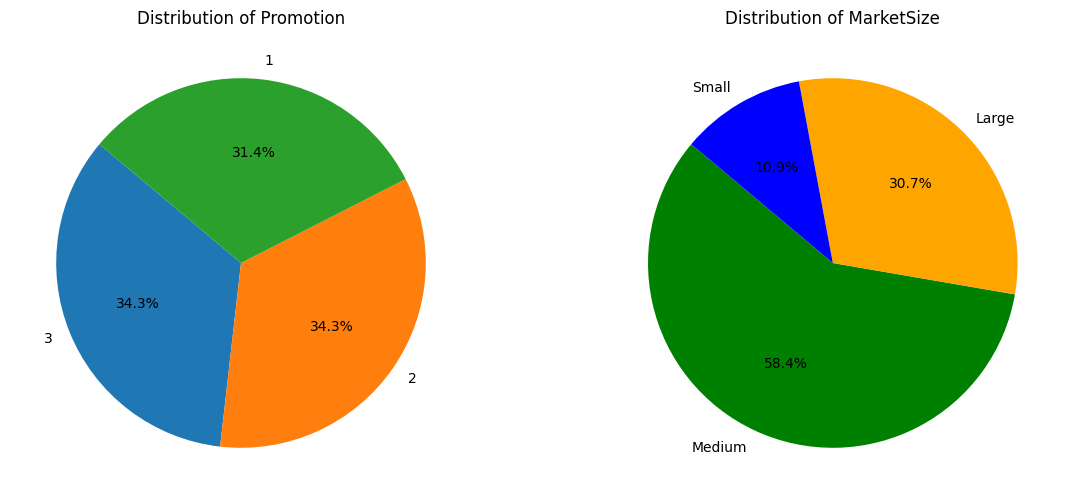

In [8]:
prom_mkt_size_view(mkt_camp_df)

The distribution be `Promotion` shows that the applied promotions in the market have similar sizes or roughly equaly distributed. Same distribution for Promotions 2 and 3, but slighly less for Promotion 1. <br/>For the `MarketSize` it is possible to see that the higher majority of the market sizes are Medium, with almost 60% of the distribution. To better understand the effectivness of the promotions, by checking the sales distribution and the market size.

With the above findings, I was interested in checking the relationship between the `Promotion` and `MarketSize` features. The goal was to understand if the promotions were more effective in specific market sizes and then if that could give more insights to this project's goal. 

In [9]:
mkt_grp_df = mkt_camp_df.groupby(['MarketSize',
                                  'Promotion']).size().reset_index()
mkt_grp_df.columns = ['MarketSize', 'Promotion', 'Count']

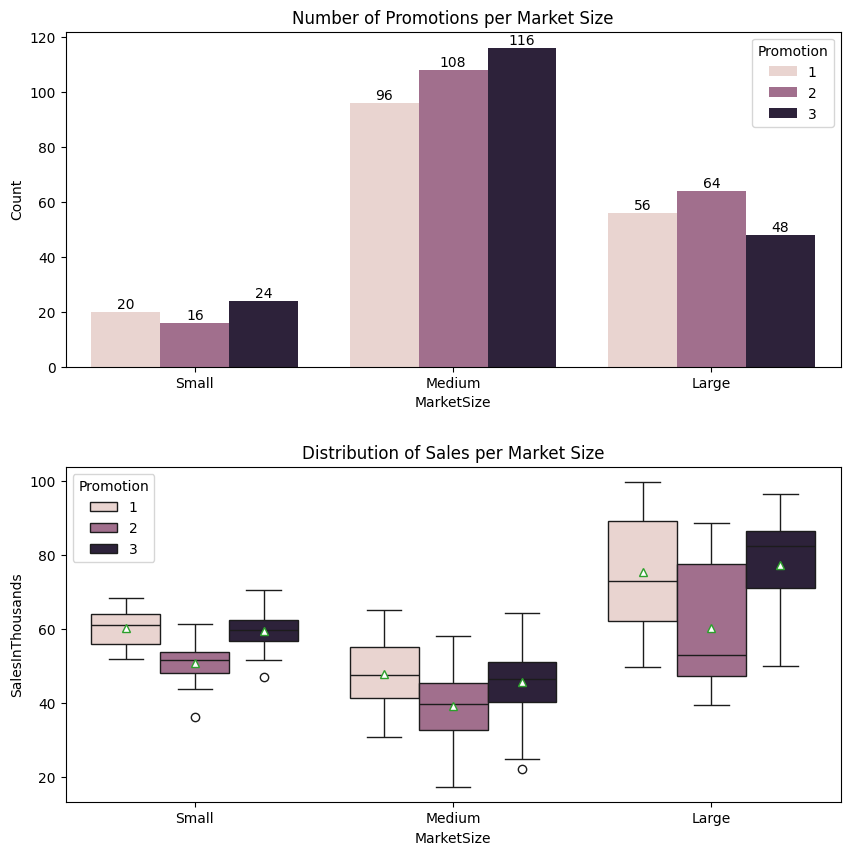

In [10]:
promotion_analysis(mkt_grp_df, mkt_camp_df)

In [11]:
# Distribution of Promotion
print(mkt_camp_df['Promotion'].value_counts())

Promotion
3    188
2    188
1    172
Name: count, dtype: int64


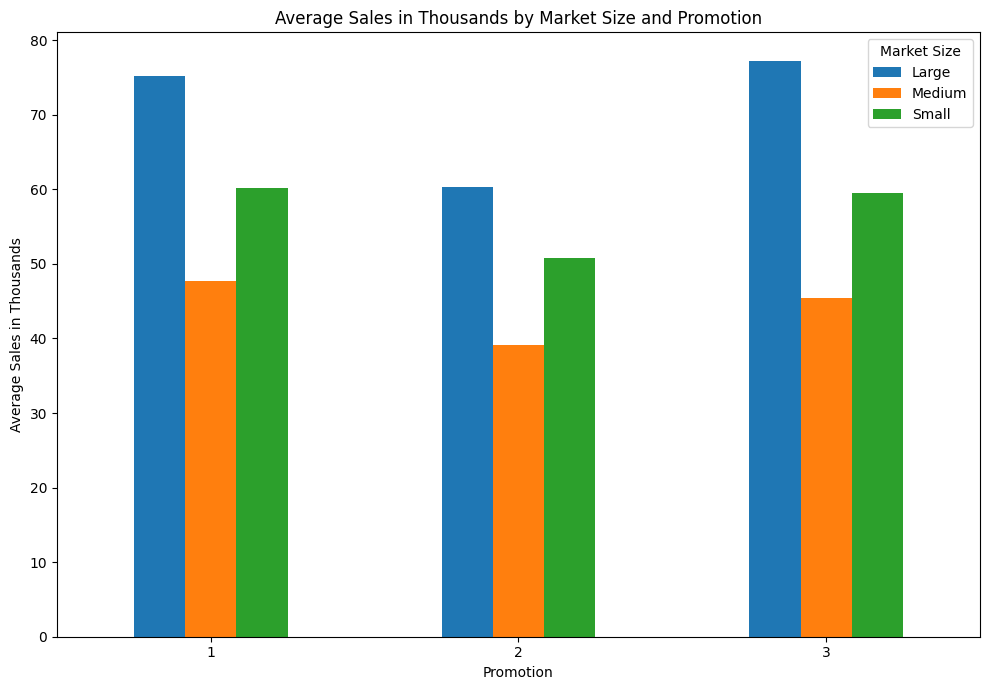

In [12]:
avg_sales_by_mkt_size_and_promotion(mkt_camp_df)

## Conclusion about Promotion and Market Size
**Promotion Incidence vs. Effectiveness:** Although the medium market size has the highest number of promotions for all types (Prom1, Prom2, Prom3), this does not directly translate to higher sales figures. The fact that small and large markets have higher mean sales despite fewer promotions suggests that the effectiveness of promotions is not solely dependent on their frequency. This indicates a potential mismatch between the target market size and the promotion strategy.<br/> Also, for the Large Market Size, we can see the mean is higher than the median for Promotions 1 and 2, which indicates that the data is right-skewed. This could mean that there are some stores within this market size, that have a high sales value, which is increasing the mean value.

**Market Size Impact:** The small and large markets outperform the medium market in terms of sales means, despite having fewer promotions. This could imply that market size has a significant impact on sales performance, and that promotions might be more effective in these markets due to factors such as less competition, better market fit, or a more engaged customer base.

In summary, while the medium market size sees the highest incidence of promotions, the actual sales figures suggest that promotions are more effective in the small and large markets. This highlights the importance of aligning promotion strategies with market characteristics and suggests potential areas for strategic adjustments.

### Analyzing Sales and Age of Store
Now, I want to check the relationship between the sales and the age of the store. I will use a scatter plot to visualize this relationship, since this can give more insights about the findings above towards the goal.

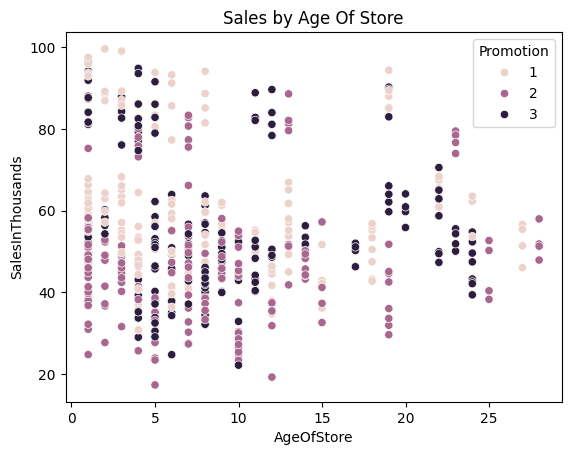

In [13]:
# Sales by AgeOfStore
sns.scatterplot(x='AgeOfStore', y='SalesInThousands',
                hue='Promotion', data=mkt_camp_df)
plt.title('Sales by Age Of Store')
plt.show()

Looking at the scatter plot above, it is possible to roughly see that the sales are more concentrated within the stores from 1 to 15 years. That could mean that the stores that are older than 15 years are not performing well, or that the dataset has fewer stores with this age.

Now, since I have a better understanding over the Promotions with the Market Size and Sales, I will check the correlation between the features and the target variable

## Correlations
Since correlations can give more insights about the relationships between the features and the target variable, I will check these possible correlations through a heatmap.
Since `MarketSize` is a categorical feature, I will map it to numerical values to check the correlation with the other features.

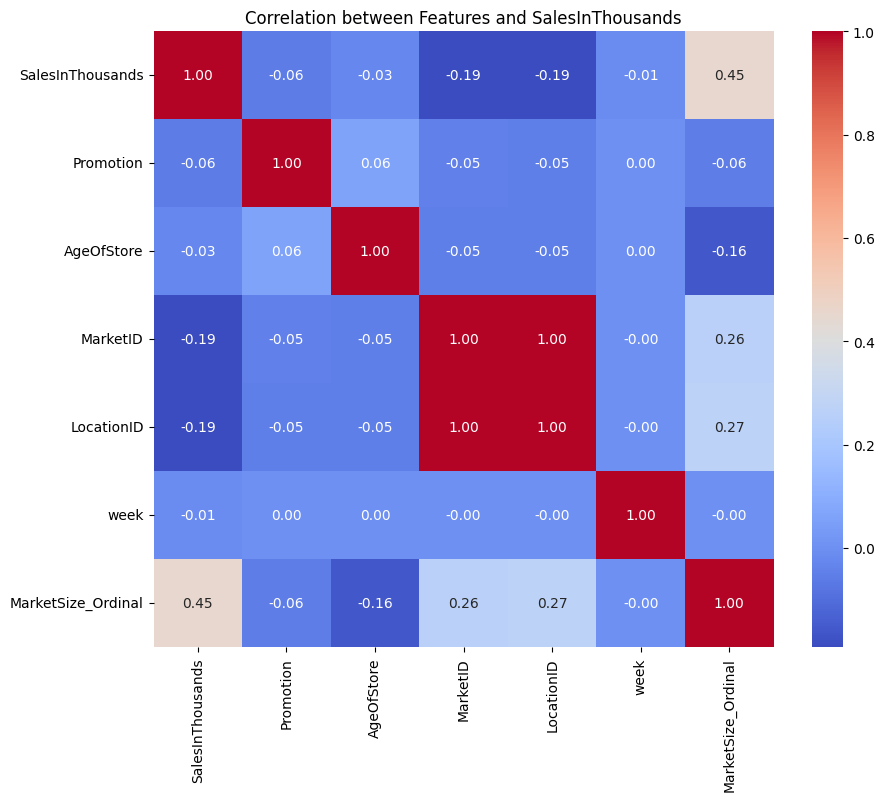

In [14]:
corr_with_sales(mkt_camp_df)

Most of correlations are inexistent or strongly weak correaltions.<br/>The perfect correlation between `MarketID` and `LocationID` arises because these are unique identifiers, not because they share a meaningful relationship. Each identifier uniquely labels an entity, making their correlation a statistical artifact rather than an indication of a real-world link. Thus, this correlation does not inform our analysis and can be ignored.<br/> We can see only a weak correlation (`0.45`) between `MarketSize(Ordinal)`(since this is a categorical feature) and `SalesInThousands`, which is not enough to make any assumptions. However, I decided to further explore this correlation, as below.

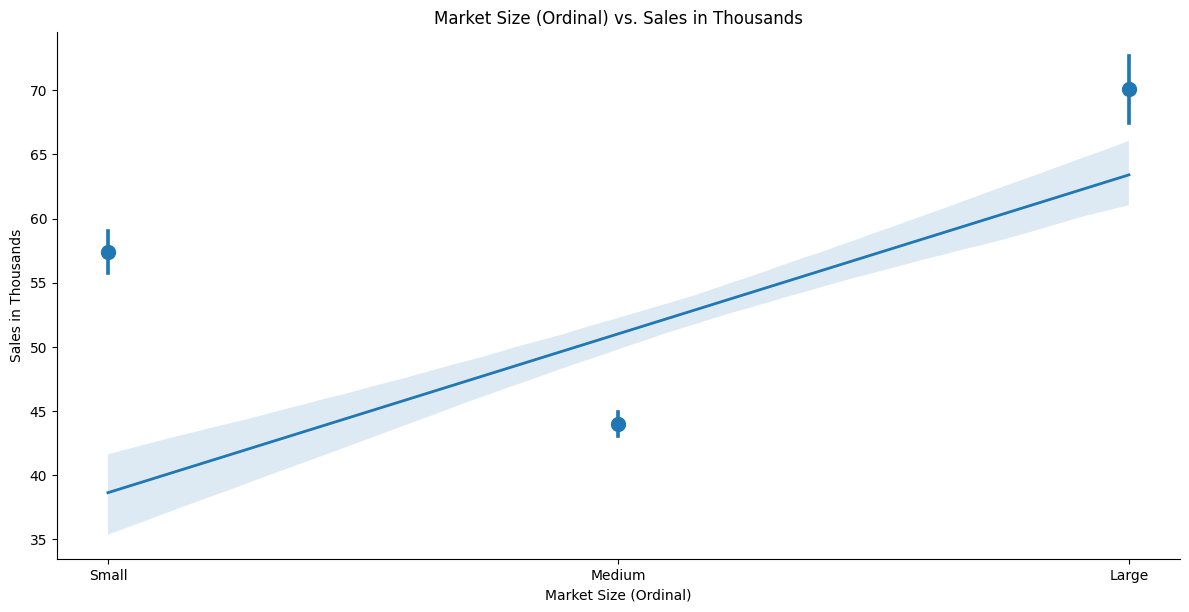

In [15]:
# Define a mapping from 'MarketSize' categories to ordinal values
market_size_mapping = {'Small': 1, 'Medium': 2, 'Large': 3}

# Map the 'MarketSize' column to a new 'MarketSize_Ordinal' column
mkt_camp_df['MarketSize_Ordinal'] = mkt_camp_df['MarketSize']\
    .map(market_size_mapping)

plot_sales_by_market_size(mkt_camp_df)

In [16]:
# Aggregate data to support the findings
mkt_agg_data = (
    mkt_camp_df.groupby('MarketSize_Ordinal')['SalesInThousands']
    .agg(['mean', 'std', 'count'])
    .reset_index()
)

print(mkt_agg_data)

   MarketSize_Ordinal       mean        std  count
0                   1  57.409333   6.633101     60
1                   2  43.985344   9.051378    320
2                   3  70.116726  17.052156    168


### Conclusion between Market Size and Sales Analysis

The above graph shows a linear regression showing the relationship between MarketSize_Ordinal and SalesInThousands. The fact that the line goes up from the origin indicates a positive relationship between these two variables. As MarketSize_Ordinal increases, SalesInThousands also tends to increase. It suggests that even the smallest market size has a substantial base level of sales. 

Also the shadowed area around the regression line represents the confidence interval for the regression estimate, often set at 95% by default. This area gives an idea of the uncertainty around the estimated regression line. If the shaded area is narrow, it indicates that we are more confident about our regression line's accuracy. Conversely, a wider shaded area suggests more uncertainty in the estimate. The presence of this shaded area helps in understanding the reliability of the regression model's predictions.

The graph as a whole provides a visual representation of the correlation between market size and sales, quantified by the slope of the regression line. The positive slope confirms the positive correlation you found (0.45) between MarketSize_Ordinal and SalesInThousands, indicating that larger markets are associated with higher sales. The confidence interval helps assess the precision of this estimated relationship, with a narrower interval indicating more precise estimates.

## A/B Testing
To perform the A/B testing, I first want to see the sales distribution to see if the data is normally distributed. Remembering that normal dstribution is represented by a bell-shaped curve.
Also to stick to the goal, sales and promotion are the main features to be analyzed.

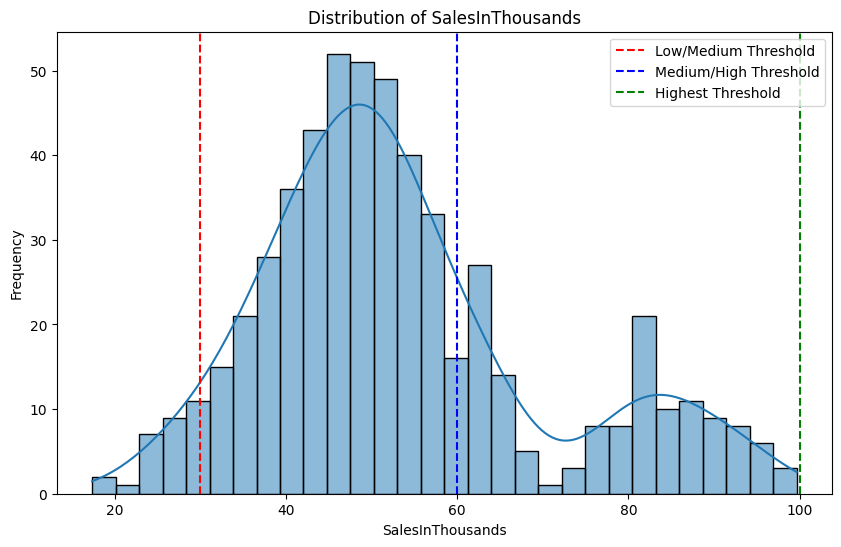


Quantiles:
0.33    45.2559
0.66    55.3914
1.00    99.6500
Name: SalesInThousands, dtype: float64


In [17]:
distribution_by_sales(mkt_camp_df, 'SalesInThousands')

I decided to input the quantiles to see the distribution of the sales data, into equal parts based on their data distribution. The results can be interpreted as follows:

* 0.33: It means that 33% of the sales data points are less than or equal to 45.2559 thousand. This can be interpreted as the lower threshold for the middle tier of sales performance.

* 0.66: It indicates that 66% of the sales data points are less than or equal to 55.3914 thousand. This value acts as the upper threshold for the middle tier, marking the beginning of the high sales performance tier.

* 1.00: It indicates that sales data points are less than or equal to 99.6500 thousand. This is the highest sales figure recorded in the dataset.

ANOVA could be used to compare the averages from different groups, however it requires the assumption that the data within each group are normally distributed.<br/> In our case, the sales data exhibits a non-normal distribution, as indicated by the bell-shaped curve with asymmetrical tails and an additional small bell curve on the right side observed in the KDE plot.<br/> Consequently, we must consider alternative statistical methods that do not rely on the normal distribution assumption to accurately assess the impact of promotional strategies on sales.

## Sales Analysis using CLT and Confidence Interval

I was particularly interested to check the mean sales distribution since it was shown the total population is not normally distributed. I decided to use the Central Limit Theorem (CLT) to create a confidence interval for the mean sales.

In [18]:
calc_confidence_interval(mkt_camp_df['SalesInThousands'])

The 95.0% confidence interval is from 52.06336535702625 to 54.86904340209785


95% Confidence Interval for the mean of SalesInThousands: (53.304578273144756, 53.68956372685524)


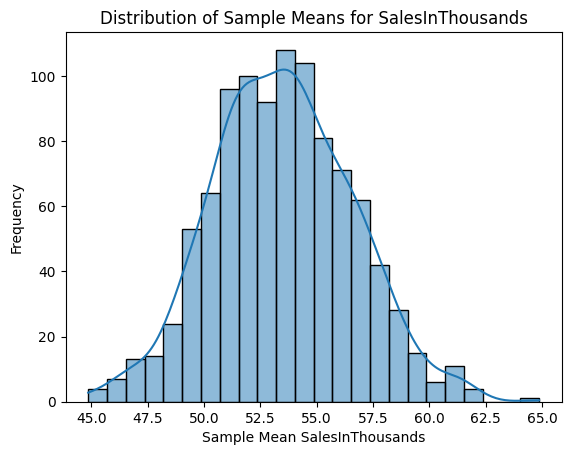

In [19]:
demonstrate_clt(mkt_camp_df, 'SalesInThousands')

## Conclusion for CLT and CI Analysis

Our study aimed to prove the Central Limit Theorem (CLT) using our sales data. The CLT states that if you take enough samples, the average of those samples will form a normal distribution, even if the original data does not. This helps us estimate the average sales with a high level of certainty.

We found:

1. The average sales from all promotions fall within a 95% confidence interval of 52.063 to 54.869. This confirms the CLT's prediction that averages from different samples will form a normal distribution as we increase the number of samples.

2. By taking 1000 samples of 30 sales each, we got a more precise 95% confidence interval for the average sales, between 53.276 and 53.660. This shows the CLT in action, giving us a tighter estimate of the average sales.

In short, our analysis supports the CLT, showing that sample averages form a normal distribution. This allows us to make reliable estimates about sales performance, helping in decision-making and forecasting.

## Confidence Interval: Analytical and Bootstrap Approach
Here I will calculate the confidence interval for the mean sales of each promotion using both the analytical and bootstrap methods. This will provide a range of values within which the true population mean is likely to fall, with a specified level of confidence.

In [20]:
analytical_promotion_ci(mkt_camp_df, mean_confidence_interval)

Promotion 3:  95% Confidence Interval (Analytical) -> Mean = 55.36, CI = [52.95, 57.78]
Promotion 2:  95% Confidence Interval (Analytical) -> Mean = 47.33, CI = [45.16, 49.50]
Promotion 1:  95% Confidence Interval (Analytical) -> Mean = 58.10, CI = [55.61, 60.59]


### Bootstrap method
The bootstrap method involves resampling the data to create multiple samples, calculating the mean for each sample, and then estimating the distribution of these means. This approach allows us to generate a confidence interval for the population mean based on the variability observed in the resampled data.<br/>
- For this function, the bootstrap is set to iterate 1000 times to generate a distribution of sample means. The confidence interval is then calculated based on the 2.5th and 97.5th percentiles of this distribution, corresponding to a 95% confidence level.

In [21]:
bootstrap_promotion_ci(mkt_camp_df)

Promotion 3:  95% Confidence Interval (Bootstrap) -> Mean = 55.35, CI = [53.05, 57.75]
Promotion 2:  95% Confidence Interval (Bootstrap) -> Mean = 47.34, CI = [45.25, 49.50]
Promotion 1:  95% Confidence Interval (Bootstrap) -> Mean = 58.10, CI = [55.66, 60.63]


## Conclusion about the Confidence Intervals (Analytical x Bootstrap)

When comparing the confidence intervals (CI) obtained from analytical methods and bootstrapping for the mean sales of different promotions, you're essentially looking at the range within which the true mean of sales is expected to lie with a certain level of confidence (typically 95%).

**Promotion 1:**<br/>
Analytical CI: [55.61, 60.59]<br/>
Bootstrap CI: [55.66, 60.63]<br/>
Both methods suggest a similar range for the true mean sales, indicating high sales performance. The slight differences in the intervals are due to the inherent randomness in the bootstrapping process and the assumptions made in the analytical method.

**Promotion 2:**<br/>
Analytical CI: [45.16, 49.50]<br/>
Bootstrap CI: [45.25, 49.50]<br/>
Again, the intervals are very close, suggesting that Promotion 2 has a lower mean sales performance compared to Promotions 1 and 3. The consistency between the two methods adds robustness to this conclusion.

**Promotion 3:**<br/>
Analytical CI: [52.95, 57.78]<br/>
Bootstrap CI: [53.05, 57.75]<br/>
The intervals for Promotion 3 are also closely matched, indicating its performance is between that of Promotions 1 and 2. The small discrepancy can be attributed to the methods' different approaches to estimating the intervals.

**Interpretation:**
Overlap: There's some overlap between the confidence intervals of the promotions, especially between Promotions 1 and 3, suggesting that while there are differences in their mean sales, these differences might not be statistically significant.<br/>

**No Overlap with Promotion 2:** Promotion 2 consistently shows a lower mean sales figure with no overlap in the CI with Promotion 1, indicating a statistically significant difference in performance between these promotions.<br/>

**Consistency Between Methods:** The close agreement between the analytical and bootstrap CIs adds confidence to the reliability of these estimates. The slight differences highlight the importance of considering multiple methods for interval estimation, especially when assumptions required for analytical methods may not hold.<br/>

In summary, Promotions 1 and 3 are performing better than Promotion 2, with Promotion 1 possibly being the best performer. The choice between analytical and bootstrap methods should be guided by the data characteristics and the assumptions underlying each method.

## Hypotheses Formulation and Testing
I want to test the effectiveness of three different marketing promotions to determine which strategy yields the highest sales. To do this, I will use `t-test` for comparing the means of two groups (in this case, between of pairs of Promotions) to determine if there is a statistically significant difference between them. Here are the specific hypotheses for each pair of promotions:

### Promotion 1 vs. Promotion 2

- **Null Hypothesis (H0)**: There is no difference in mean sales between Promotion 1 and Promotion 2.
- **Alternative Hypothesis (H1)**: There is a significant difference in mean sales between Promotion 1 and Promotion 2.

In [22]:
sales_promo1 = mkt_camp_df[mkt_camp_df['Promotion'] == 1][
    'SalesInThousands']

### Promotion 1 vs. Promotion 3

- **Null Hypothesis (H0)**: There is no difference in mean sales between Promotion 1 and Promotion 3.
- **Alternative Hypothesis (H1)**: There is a significant difference in mean sales between Promotion 1 and Promotion 3.

In [23]:
sales_promo2 = mkt_camp_df[mkt_camp_df['Promotion'] == 2][
    'SalesInThousands']

### Promotion 2 vs. Promotion 3

- **Null Hypothesis (H0)**: There is no difference in mean sales between Promotion 2 and Promotion 3.
- **Alternative Hypothesis (H1)**: There is a significant difference in mean sales between Promotion 2 and Promotion 3.

In [24]:
sales_promo3 = mkt_camp_df[mkt_camp_df['Promotion'] == 3][
    'SalesInThousands']

In [25]:
# Perform t-tests with actual sales data
print("Promotion 1 vs. Promotion 2:")
perform_ttest(sales_promo1, sales_promo2)

print("\nPromotion 1 vs. Promotion 3:")
perform_ttest(sales_promo1, sales_promo3)

print("\nPromotion 2 vs. Promotion 3:")
perform_ttest(sales_promo2, sales_promo3)

Promotion 1 vs. Promotion 2:
T-statistic: 6.453671702181005, P-value: 3.5506696512134566e-10
Estimated treatment effect (mean difference): 10.76959673428997
95% Confidence Interval for the mean difference: [7.4744540993865805, 14.064739369193358]
Reject the null hypothesis - significant difference in mean sales.

Promotion 1 vs. Promotion 3:
T-statistic: 1.5551383687293547, P-value: 0.12079667272313274
Estimated treatment effect (mean difference): 2.734543542800594
95% Confidence Interval for the mean difference: [-0.7215683089533798, 6.190655394554568]
Fail to reject the null hypothesis - no significant difference in mean sales.

Promotion 2 vs. Promotion 3:
T-statistic: -4.88139271089348, P-value: 1.562894303627738e-06
Estimated treatment effect (mean difference): -8.035053191489375
95% Confidence Interval for the mean difference: [-11.271740842965214, -4.7983655400135365]
Reject the null hypothesis - significant difference in mean sales.


## Conclusion about A/B Testing

The A/B testing conducted on the sales performance of different promotions has yielded significant insights. The comparison between Promotion 1 and Promotion 2 demonstrated a statistically significant difference in mean sales, with Promotion 1 outperforming Promotion 2. This suggests that the strategies or elements employed in Promotion 1 are more effective in driving sales.

On the other hand, the comparison between Promotion 1 and Promotion 3 did not show a significant difference in sales performance, indicating that both promotions are similarly effective. This result suggests that the unique aspects of Promotion 3, when compared to Promotion 1, do not significantly impact sales outcomes.

Finally, the analysis between Promotion 2 and Promotion 3 revealed a significant difference, with Promotion 3 outperforming Promotion 2. This highlights the effectiveness of Promotion 3 over Promotion 2 and suggests a reevaluation of the strategies used in Promotion 2.

Overall, the A/B testing provides valuable insights for future marketing strategies, emphasizing the effectiveness of the approaches used in Promotions 1 and 3. It is recommended to further analyze the components of these promotions to understand what drives their success and apply these learnings to enhance future promotional campaigns.

## Additional Approach using Chi-Square Test

Since Chi-Square Test is used to determine whether there is a significant association between two categorical variables, I decided to use it to test the relationship between the Promotion and the SalesInThousands. The contingency table was used to categorize sales data into different levels (e.g., Low, Medium, High) based on the 'SalesInThousands' variable and to compare these distributions across different promotions. This approach facilitated the application of the Chi-Square Test to assess whether the observed differences in sales categories across promotions were statistically significant, thereby providing insights into the effectiveness of each promotion.


In [26]:
# To return values to the bins for Chi-Square test
min_sales = mkt_camp_df['SalesInThousands'].min()
mean_sales = mkt_camp_df['SalesInThousands'].mean()
max_sales = mkt_camp_df['SalesInThousands'].max()

# Print the results
print(f"Minimum SalesInThousands: {min_sales}")
print(f"Mean SalesInThousands: {mean_sales}")
print(f"Maximum SalesInThousands: {max_sales}")

Minimum SalesInThousands: 17.34
Mean SalesInThousands: 53.46620437956205
Maximum SalesInThousands: 99.65


In [27]:
# Step 1: Categorize 'SalesInThousands' Data
mkt_camp_df['SalesCategory'] = pd.cut(
    mkt_camp_df['SalesInThousands'],
    bins=[17.34, 53.46620437956205, 99.65, np.inf],
    labels=['Low', 'Medium', 'High'])

# Step 2: Create a Contingency Table
contingency_table = pd.crosstab(
    mkt_camp_df['Promotion'], mkt_camp_df['SalesCategory'])

# Step 3: Apply the Chi-Square Test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-Square Test: Statistic={chi2_stat}, p-value={p_val}")

# Interpretation
if p_val < 0.05:
    print("There is a significant difference in the distribution "
          "of sales categories between promotions.")
else:
    print("There is no significant difference in the distribution "
          "of sales categories between promotions.")

Chi-Square Test: Statistic=50.972857884948425, p-value=8.538558276393605e-12
There is a significant difference in the distribution of sales categories between promotions.


## Chi-Square Analysis Conclusion

The Chi-Square Test was conducted to assess whether there is a significant variance in the distribution of sales categories among various promotional strategies. With a Chi-Square statistic of 50.97 and a p-value of roughly 8.54e-12, we possess substantial evidence to dismiss the null hypothesis, which posits no disparity in the distribution of sales categories across different promotions.

The exceedingly small p-value, significantly below the standard alpha level of 0.05, strongly suggests that the noted discrepancies in the distribution of sales categories among promotions did not occur by mere chance. Hence, we deduce that there is a statistically significant difference in the distribution manner of sales categories across the promotions analyzed.

This outcome implies that the efficacy of promotional strategies is not uniform, affecting sales categories in diverse ways. It is crucial for marketers and decision-makers to take this variability into account when crafting and executing future promotional plans, aiming to enhance sales performance across various categories.

## Decision Making
Given the results from the statistical tests comparing the effectiveness of different promotions on sales, we can make a decision on which promotion strategy to recommend. The decision will be based on the statistical significance of the differences in mean sales and the estimated treatment effects (mean differences) between the promotions.

**Summary of Findings:**<br/>

**Promotion 1 vs. Promotion 2:**<br/>
 - Significant increase in mean sales with Promotion 1 compared to Promotion 2.<br/>
 - Estimated treatment effect: +10.77 thousand sales (Promotion 1 is better)..<br/>
  
**Promotion 1 vs. Promotion 3:**<br/>
- No significant difference in mean sales.<br/>
- Estimated treatment effect: +2.73 thousand sales (not statistically significant).<br/>
  
**Promotion 2 vs. Promotion 3:**<br/>
- Significant increase in mean sales with Promotion 3 compared to Promotion 2.<br/>
- Estimated treatment effect: -8.04 thousand sales (Promotion 3 is better).<br/>

**A/B Testing**<br/>
This dual approach for A/B testing using both the Chi-Square and T-tests allows for a robust analysis, confirming that not only do promotions affect sales categories differently, but they also have varying impacts on the average sales figures. This comprehensive analysis aids in making informed decisions regarding which promotional strategies to pursue for optimizing sales performance.<br/>

**Decision Recommendation:**<br/>
- Promotion 1 and Promotion 3 are the most effective strategies, with Promotion 1 showing a significant advantage over Promotion 2 and no significant difference when compared to Promotion 3. However, Promotion 3 also significantly outperforms Promotion 2, making both Promotion 1 and Promotion 3 viable options.<br/>
- Given the statistical evidence, Promotion 1 should be recommended if the goal is to maximize sales, as it consistently performs well against both other promotions. However, if the cost or other factors associated with Promotion 1 are considerably higher than those for Promotion 3, then Promotion 3 could be considered a cost-effective alternative.
- Although promotions have more incidence over Medium market size, they are more effective in the Small and Large Markets and therefore, it is recommended to focus on these market sizes for future campaigns. This alignment between market size and promotion effectiveness can lead to better sales outcomes and improved marketing ROI.